In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
def depart(initial_matrix):
    kl = initial_matrix[15:]
    tk = []
    for i in range(113):    
        t = kl[i][20:110]
        tk.append(t)
    return tk

In [4]:
all_file = os.listdir('./face/rawdata')
data_x = np.zeros((len(all_file),128,128))
data_y = np.zeros(len(all_file))
data1_x = np.zeros((len(all_file),113,90))
data2_x = np.zeros((len(all_file),113,90))
# 将两个数据标签整理再一起
f = open('./face/faceDR','r')
r1 = f.readlines()
f.close()

f = open('./face/faceDS','r')
r2 = f.readlines()
f.close()
for i in r2:
    r1.append(i)

# 整理出data_x,和data_y
all_file = os.listdir('./face/rawdata')
for i in range(len(all_file)):
    with open('./face/rawdata/'+all_file[i],'rb') as f:
        x = np.fromfile(f,dtype=np.ubyte)
        t = x.reshape(128,-1)
        data_x[i] = t
        for j in r1:
            if all_file[i] in j:
                if 'female' in j:
                    data_y[i] = 0
                elif 'male' in j:
                    data_y[i] = 1
                else:
                    data_y[i] = None
                break
#缩小图片，及离散处理
for i in range(len(all_file)):
    data1_x[i] = depart(data_x[i])

In [5]:
data1_x.shape

(3983, 113, 90)

In [6]:
X = data1_x.reshape(data1_x.shape[0],-1)#拉长数组

In [7]:
X.shape

(3983, 10170)

In [8]:
from sklearn.cluster import KMeans
n_clusters = 7
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

In [9]:
y_pred = cluster.labels_

In [10]:
a = 0
a1 = 0
number = []
number1 = []
for i in range(len(y_pred)):
    if y_pred[i]==3:
        a += 1
        number.append(i)
for i in range(len(y_pred)):
    if y_pred[i]==2:
        a1 += 1
        number1.append(i)
print(a1,number1)

480 [24, 137, 326, 329, 335, 336, 338, 339, 384, 396, 404, 406, 407, 408, 409, 410, 412, 424, 429, 431, 438, 484, 492, 499, 510, 551, 552, 553, 554, 562, 564, 581, 612, 615, 616, 621, 637, 657, 816, 853, 854, 855, 866, 867, 883, 884, 885, 896, 897, 906, 907, 915, 941, 942, 945, 946, 947, 948, 951, 952, 985, 986, 1018, 1086, 1087, 1109, 1110, 1120, 1126, 1127, 1153, 1199, 1204, 1222, 1230, 1241, 1242, 1243, 1260, 1261, 1272, 1273, 1342, 1350, 1351, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1435, 1466, 1467, 1500, 1529, 1551, 1566, 1608, 1609, 1618, 1619, 1620, 1656, 1658, 1665, 1683, 1684, 1698, 1708, 1723, 1737, 1740, 1776, 1814, 1815, 1818, 1819, 1821, 1822, 1827, 1846, 1847, 1848, 1868, 1869, 1910, 2020, 2043, 2045, 2047, 2133, 2139, 2141, 2145, 2146, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2215, 2218, 2220, 2221, 2223, 2224, 2226, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 22

In [23]:
#观察准确率，不重要
b = 0
k = data_y == y_pred
for i in range(len(k)):
    if k[i]==True:
        b += 1
print(b)

2040


In [186]:
#观察所在类别
y_pred[2450]

6

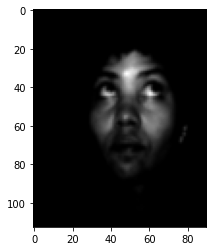

In [128]:
#观察样本
k = data1_x[2635]
plt.imshow(k,cmap=plt.cm.gray)
plt.show()

In [3]:
#删除示范
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
index = [2, 3, 6]
new_a = np.delete(a, 1)
print(new_a)
print(a[1])
print(np.delete(a, [0,1], axis=0))

[1 3 4 5 6 7 8 9]
[4 5 6]
[[7 8 9]]


In [11]:
#处理数据
k = number1+number
data2_x = np.delete(X, k, axis=0)
data1_y = np.delete(data_y, k)
print(data2_x.shape)
print(data1_y.shape)
print(X.shape)
print(k)

(3450, 10170)
(3450,)
(3983, 10170)
[24, 137, 326, 329, 335, 336, 338, 339, 384, 396, 404, 406, 407, 408, 409, 410, 412, 424, 429, 431, 438, 484, 492, 499, 510, 551, 552, 553, 554, 562, 564, 581, 612, 615, 616, 621, 637, 657, 816, 853, 854, 855, 866, 867, 883, 884, 885, 896, 897, 906, 907, 915, 941, 942, 945, 946, 947, 948, 951, 952, 985, 986, 1018, 1086, 1087, 1109, 1110, 1120, 1126, 1127, 1153, 1199, 1204, 1222, 1230, 1241, 1242, 1243, 1260, 1261, 1272, 1273, 1342, 1350, 1351, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1435, 1466, 1467, 1500, 1529, 1551, 1566, 1608, 1609, 1618, 1619, 1620, 1656, 1658, 1665, 1683, 1684, 1698, 1708, 1723, 1737, 1740, 1776, 1814, 1815, 1818, 1819, 1821, 1822, 1827, 1846, 1847, 1848, 1868, 1869, 1910, 2020, 2043, 2045, 2047, 2133, 2139, 2141, 2145, 2146, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2215, 2218, 2220, 2221, 2223, 2224, 2226, 2228, 2229, 2230, 2231, 2232, 

In [12]:
#贝叶斯尝试
from NB import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(data2_x,data1_y,shuffle = True,random_state=60,test_size = 0.3)
#X_train,X_test,Y_train,Y_test = train_test_split(X,data_y,shuffle = True,random_state=60,test_size = 0.3)

In [14]:
bnb = BernoulliNB().fit(X_train,Y_train)
gnb = GaussianNB().fit(X_train,Y_train) 
mnb = MultinomialNB().fit(X_train,Y_train)
cnb = ComplementNB().fit(X_train,Y_train) 
acc_score2 = bnb.score(X_test,Y_test)
print(acc_score2)

0.6676328502415458


In [15]:
cv3 = cross_val_score(bnb,data2_x,data1_y,cv=5)
cv1 = cross_val_score(gnb,data2_x,data1_y,cv=5)
cv2 = cross_val_score(mnb,data2_x,data1_y,cv=5)
cv4 = cross_val_score(cnb,data2_x,data1_y,cv=5)
#cv1 = cross_val_score(bnb,X,data_y,cv=5)


In [16]:
print(cv1)
print(sum(cv1)/5)
print(sum(cv2)/5)
print(sum(cv3)/5)
print(sum(cv4)/5)

[0.59710145 0.6173913  0.63043478 0.50289855 0.61594203]
0.5927536231884057
0.6078260869565217
0.6315942028985507
0.6078260869565217


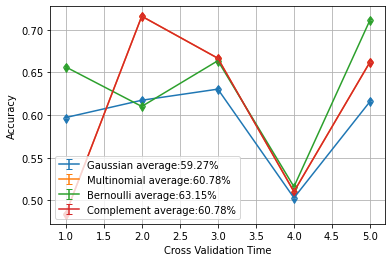

In [17]:
fig = plt.figure()
x = [1,2,3,4,5]
yerr = np.linspace(0.05, 0.2, 5)
plt.errorbar(x, cv1,  yerr=yerr, uplims=True, lolims=True,
             label='Gaussian average:59.27%' )
plt.errorbar(x, cv2,  yerr=yerr, uplims=True, lolims=True,
             label='Multinomial average:60.78%')
plt.errorbar(x, cv3,  yerr=yerr, uplims=True, lolims=True,
             label='Bernoulli average:63.15%')
plt.errorbar(x, cv4,  yerr=yerr, uplims=True, lolims=True,
             label='Complement average:60.78%')
plt.grid()
plt.xlabel('Cross Validation Time')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.show()